1/1 [==============================] - 0s 310ms/step


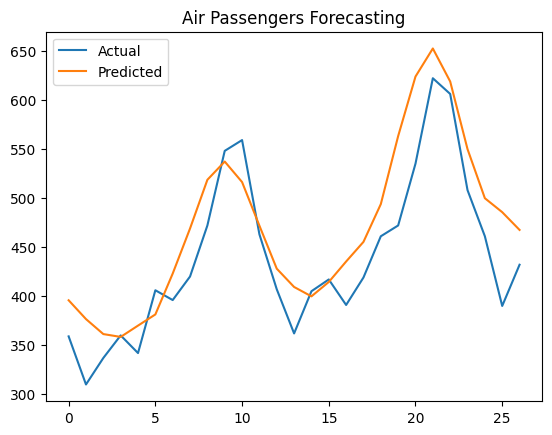

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\HP\Desktop\DUK\sem_2\deep learning\time_forcasting\AirPassengers.csv'
df = pd.read_csv(file_path)

# Step 1: Convert 'Month' to datetime and rename column
df['Month'] = pd.to_datetime(df['Month'])
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

# Step 2: Set 'Month' as index and normalize the 'Passengers' data
df.set_index('Month', inplace=True)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[['Passengers']])

# Step 3: Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 12
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM input [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# Predict
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Plot
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.legend()
plt.title("Air Passengers Forecasting")
plt.show()